## Minimising Churn Rate Through Analysis of Financial Habbits


### Introduction

* Subscription Products often are the main source of revenue for companies across all industries.These products can come in the form of a 'one size fits all' overcompassing subscription, or in multi-level memberships. Regardless of how their memberships, or what industry they are in, companies almost always try to minimize customer churn(a.k.a subscription cancellations). To retain their customers, these companies first need to identify behavioural patterns that act as catalyst in disengagement with the product.
* The objective of this model is to predict which user are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email remainders about the benifits of the product, especially focusing on features that are new or that the user has shown to value.

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('churn_data.csv')

In [3]:
df['android_user']

0        0
1        0
2        1
3        1
4        1
        ..
26995    1
26996    1
26997    1
26998    0
26999    1
Name: android_user, Length: 27000, dtype: int64

In [4]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning

In [6]:
# Removing Nan
df.isna().sum(axis = 0)

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [7]:
# Getting rid of the four rows that have NA values for Age
df = df[pd.notnull(df['age'])]

In [8]:
# Getting rid of 'credit_score' and 'rewards_earned' columns since they contain so many nulls
df = df.drop(columns = ['credit_score','rewards_earned'])

In [9]:
# We'll remove the 'user' column which is a user identifier which's not a useful feature .
# And also we'll drop the 'churn' columns which we'll use as the Target variable.
df2 = df.drop(columns = ['user', 'churn'])

### Exploratory Data Analysis

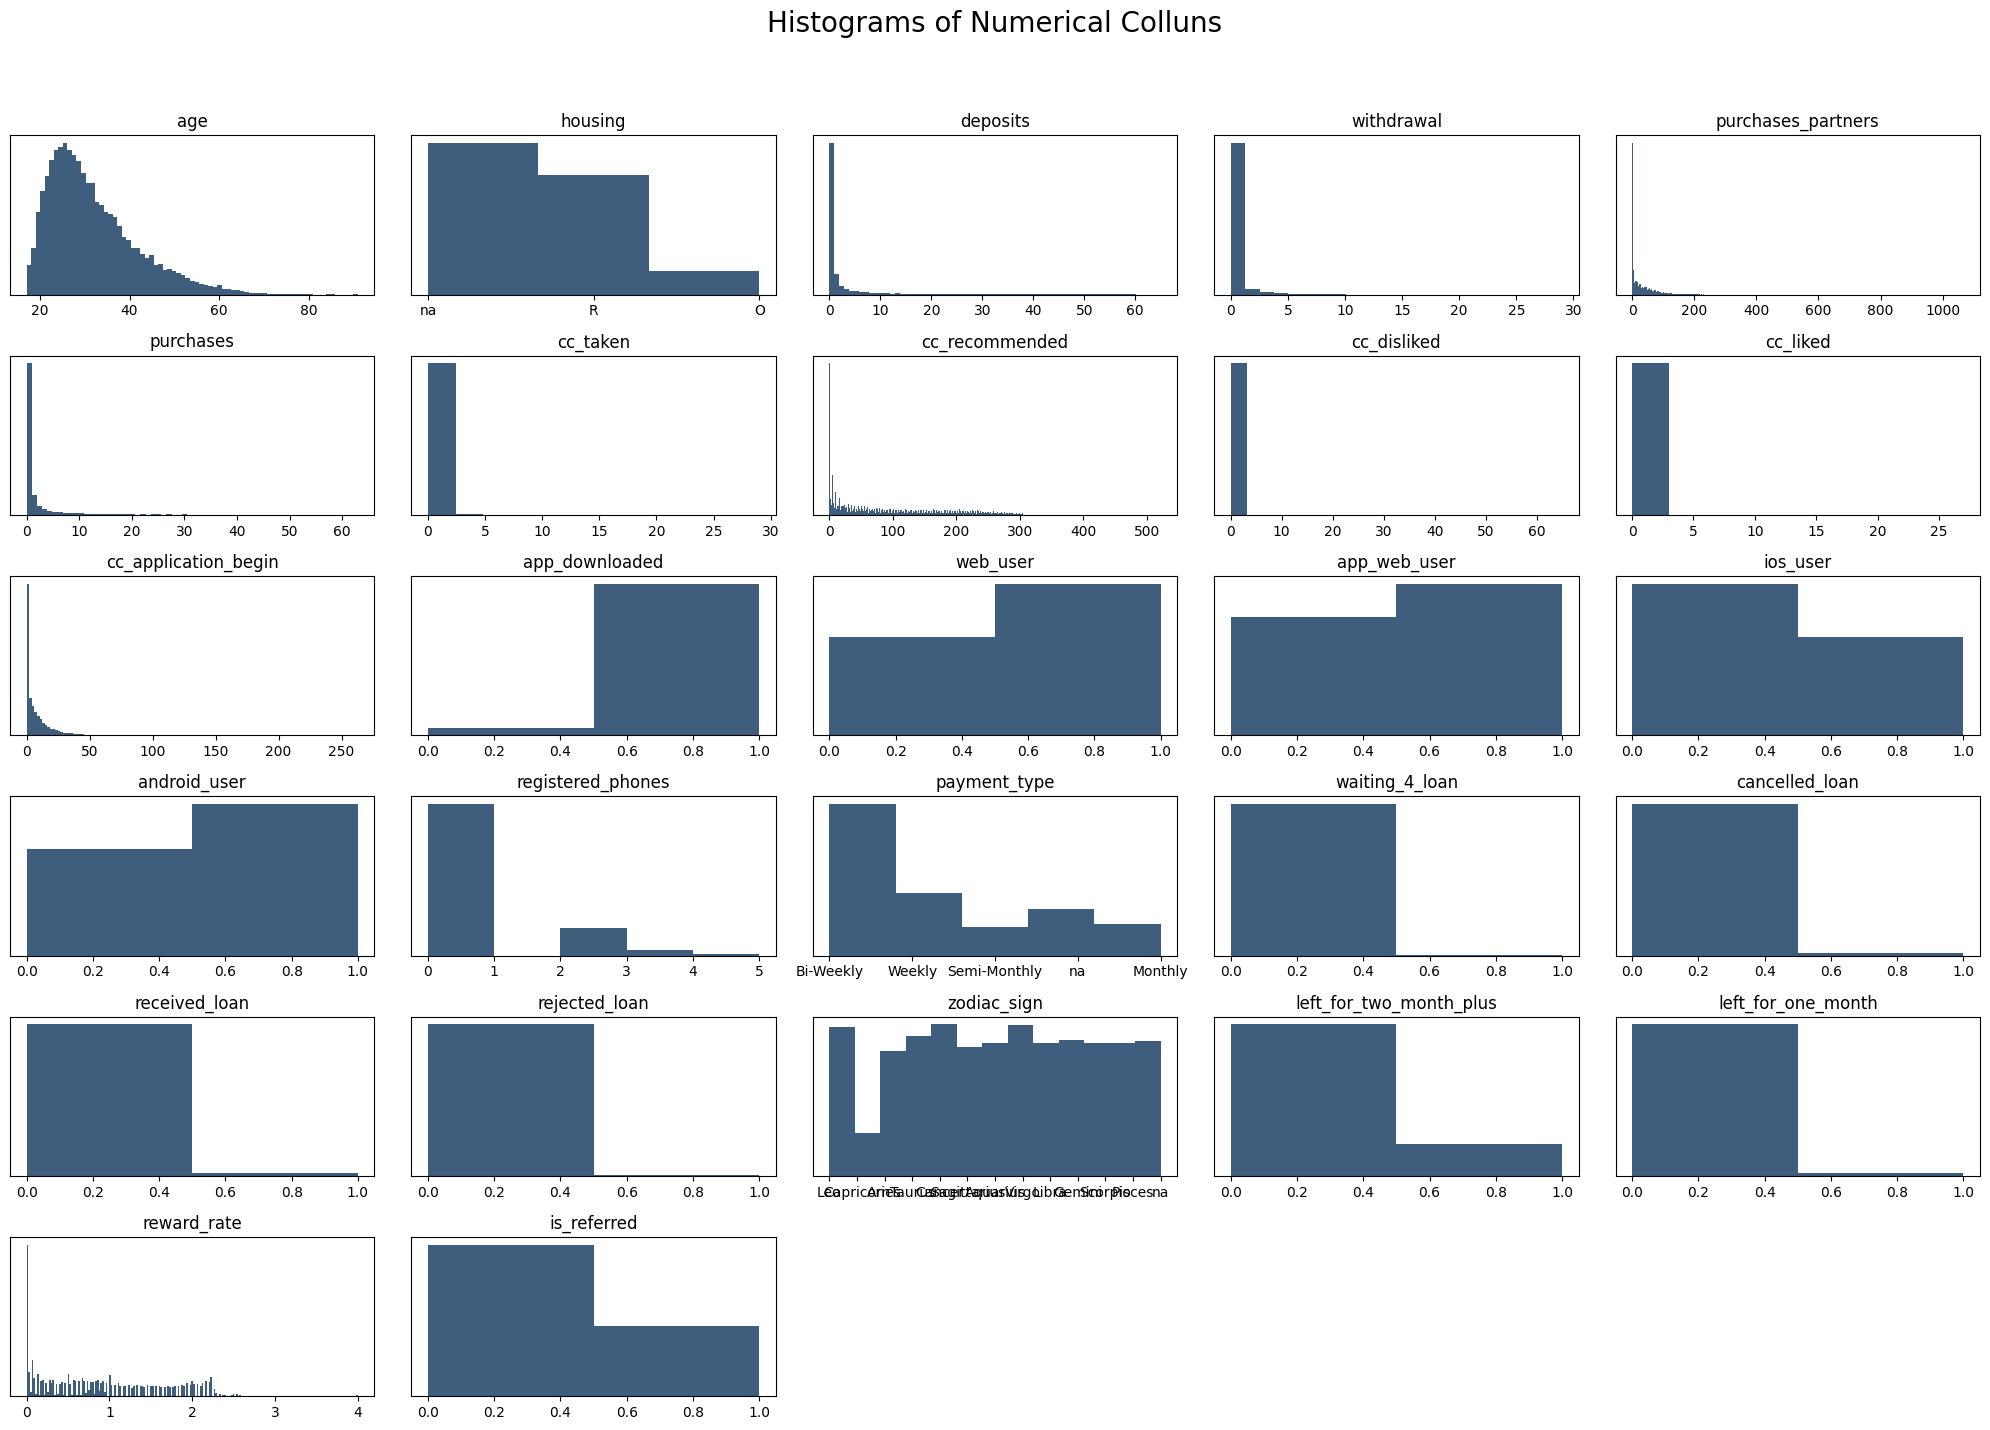

In [11]:
# Histograms

fig = plt.figure(figsize = (20,15))
plt.suptitle('Histograms of Numerical Colluns', fontsize = 20)
for i in range(1 ,df2.shape[1] + 1):
    plt.subplot(6,5,i)
    f =plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i-1])
    
    vals = np.size(df2.iloc[:, i-1].unique())
    
    plt.hist(df2.iloc[:, i-1], bins = vals ,color = '#3F5D7D')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

In [12]:
# Binary categorical variables
dfb = df[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]


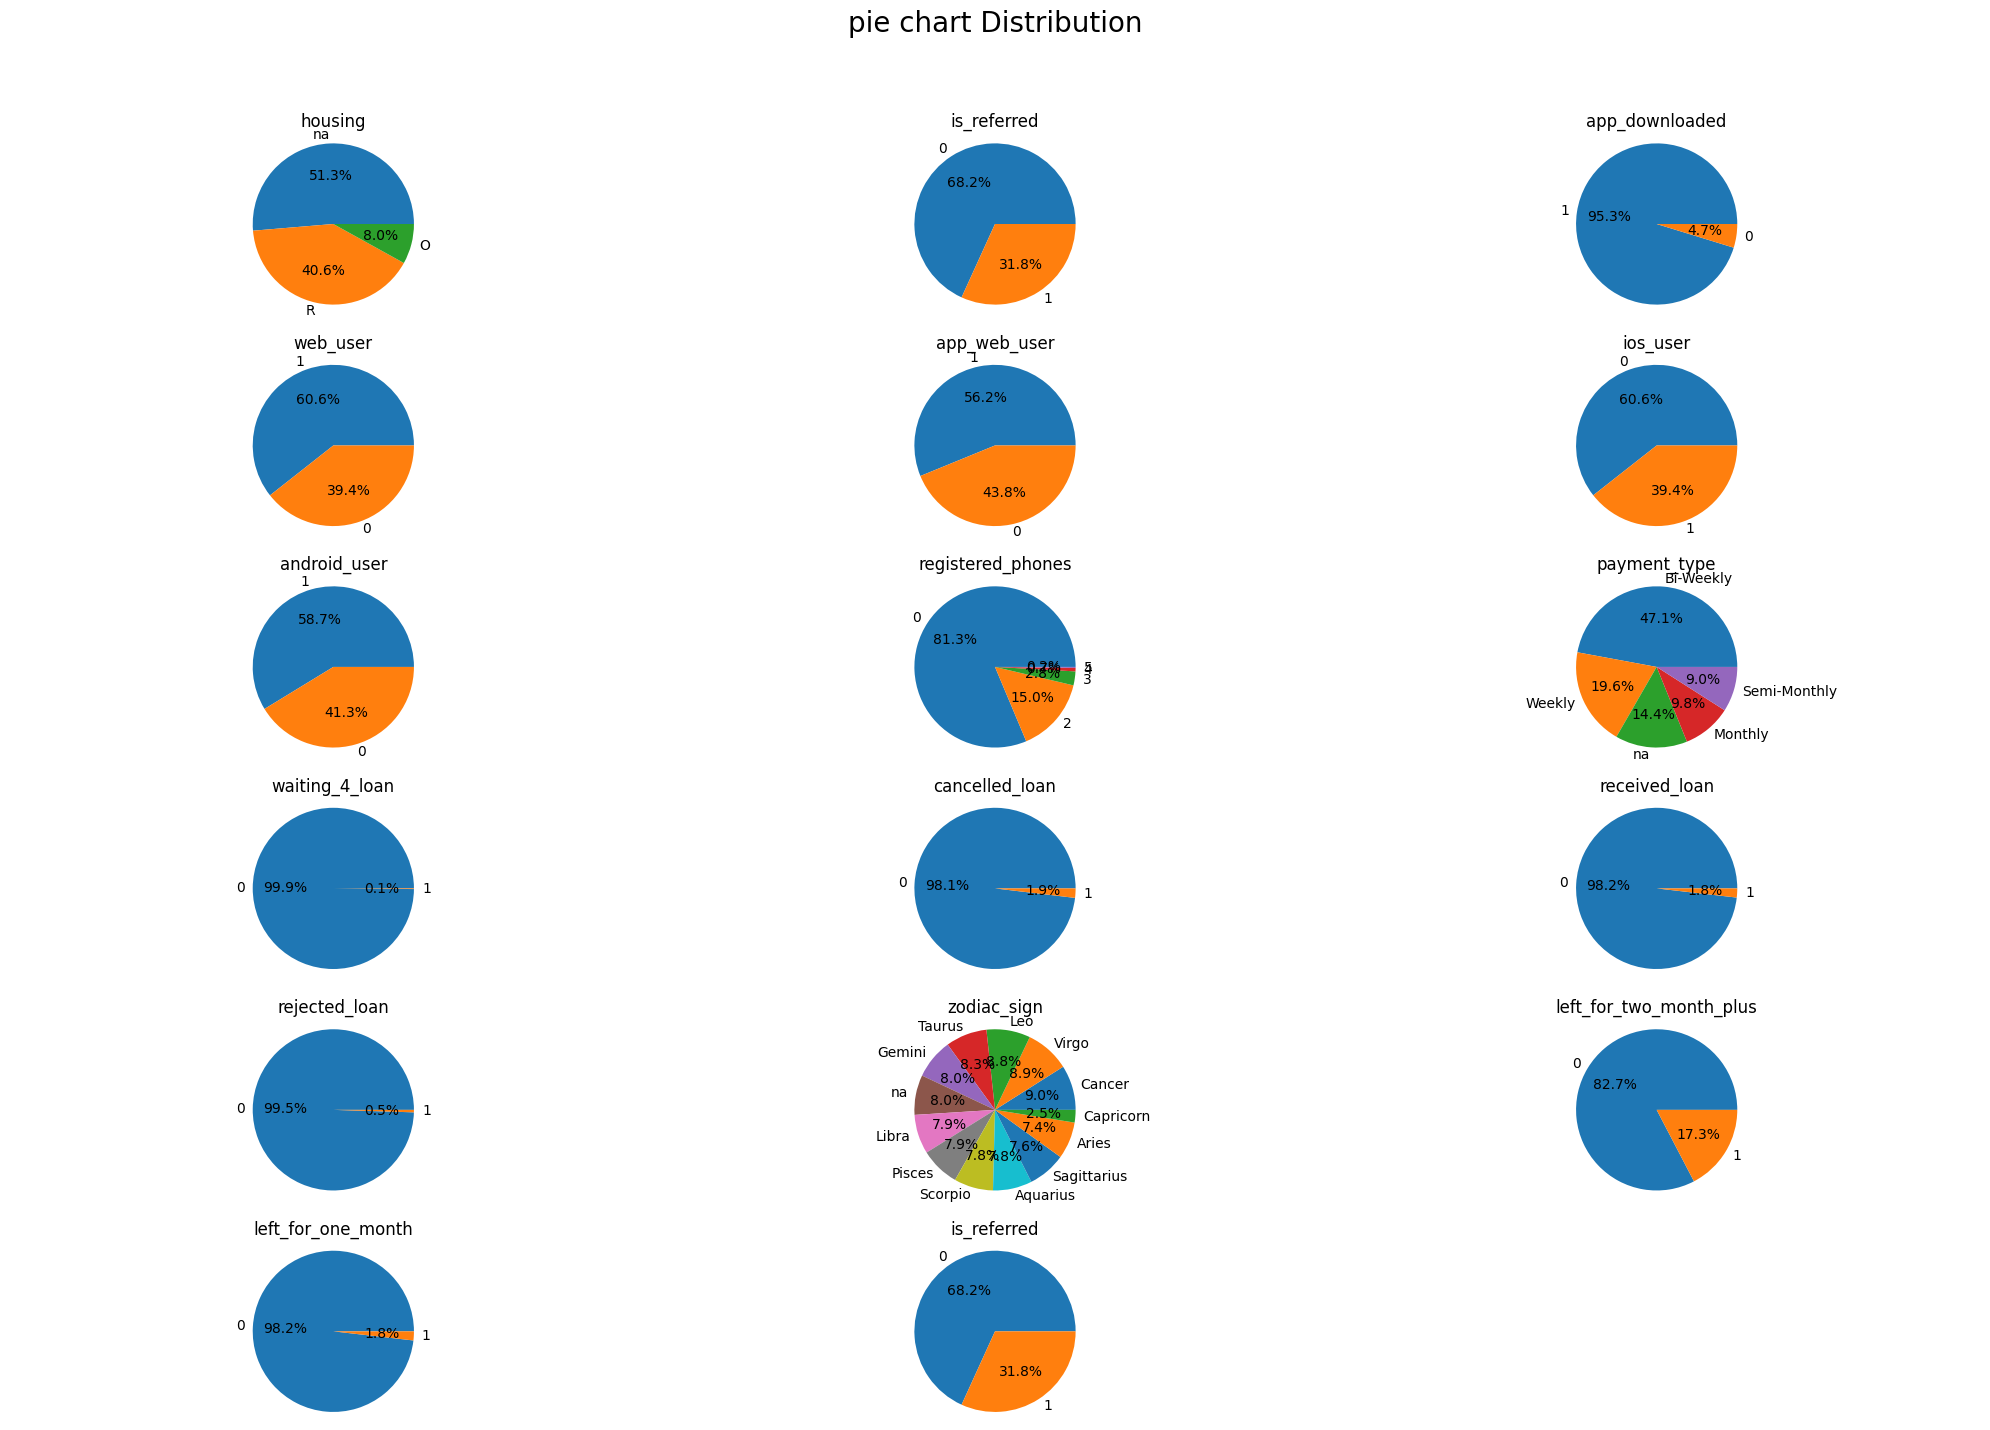

In [13]:
# Pie Charts Categorical Variables
fig = plt.figure(figsize = (20,15))
plt.suptitle('pie chart Distribution', fontsize = 20)
for i in range(1 ,dfb.shape[1] + 1):
    plt.subplot(6,3,i)
    f =plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dfb.columns.values[i-1])
    values = dfb.iloc[:, i-1].value_counts(normalize = True).values
    index = dfb.iloc[:, i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index , autopct = '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

In [62]:
df[dfb.waiting_4_loan == 1].churn.value_counts()

churn
0    27
1     8
Name: count, dtype: int64

In [63]:
df[dfb.cancelled_loan == 1].churn.value_counts()

churn
1    274
0    234
Name: count, dtype: int64

In [64]:
df[dfb.rejected_loan == 1].churn.value_counts()

churn
1    107
0     25
Name: count, dtype: int64

In [65]:
df[dfb.left_for_one_month == 1].churn.value_counts()

churn
1    266
0    222
Name: count, dtype: int64

### Exploring Uneven Features

<Axes: title={'center': 'Correlation with Responce Variable'}>

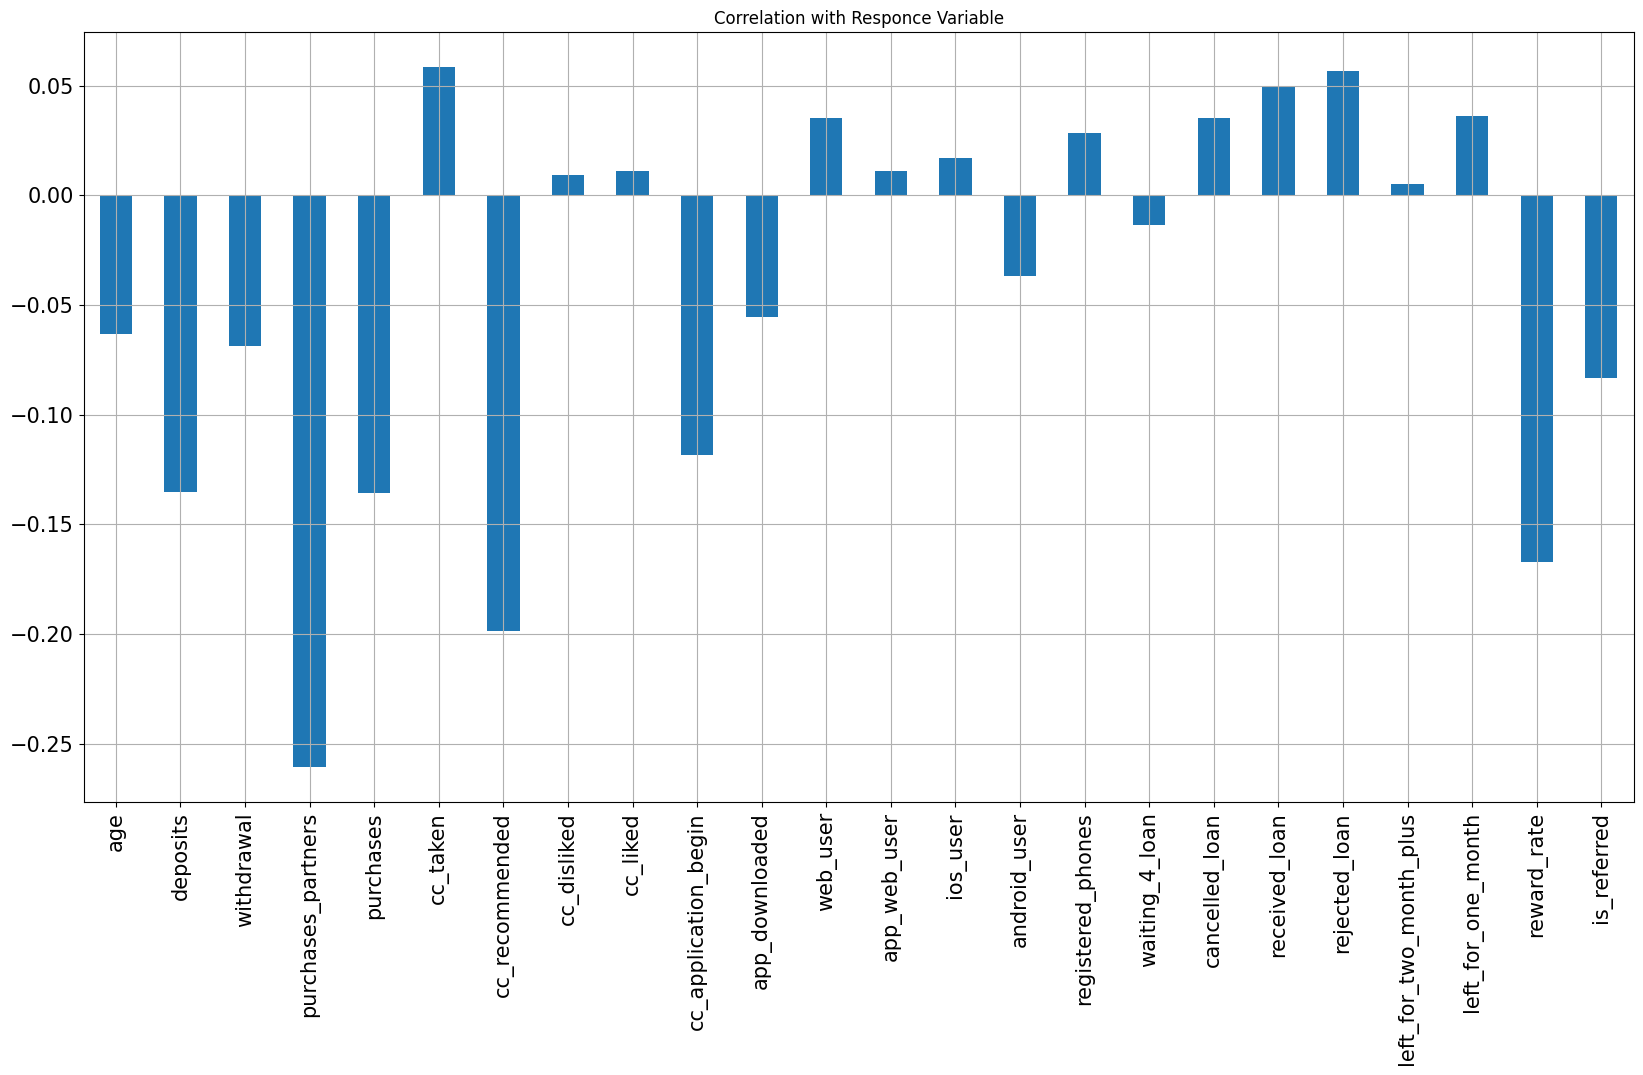

In [46]:
df.drop(columns=['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(df.churn).plot.bar(
    figsize =(20, 10),title = 'Correlation with Responce Variable', fontsize = 15 ,
    rot = 90, grid = True)

<Axes: >

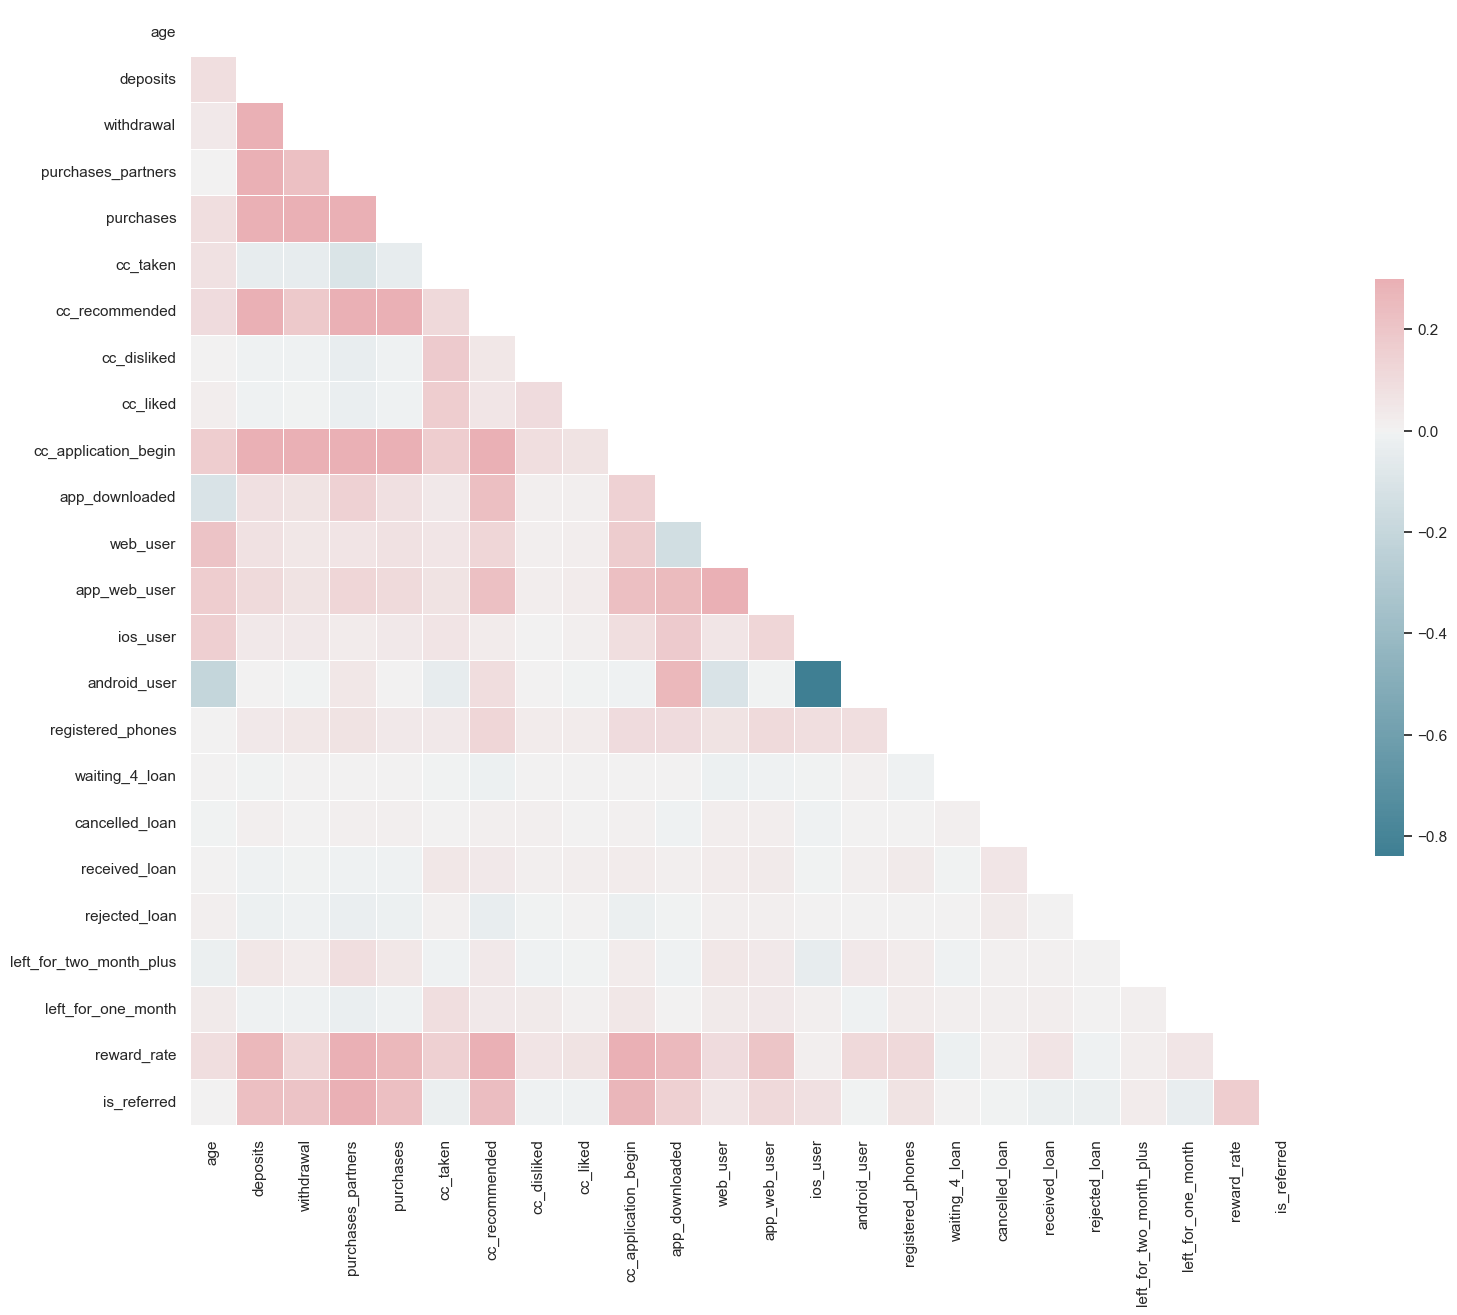

In [84]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.drop(columns=['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
# 'app_web_user' is not an independent attribute it depends on both 'web_user' and 'app_downloaded' so we are going to remove it .
df.drop(columns = ['app_web_user'],inplace = True)

### Model preperation

In [86]:
# Data Preperation
user_identifier = df['user']
df = df.drop(columns =['user'])

One-hot-encoding

In [91]:
df.housing.value_counts()

housing
na    13856
R     10969
O      2171
Name: count, dtype: int64

In [92]:
df =pd.get_dummies(df)

In [97]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

In [96]:
df = df.drop(columns = ['housing_na',  'zodiac_sign_na',  'payment_type_na'])

In [99]:
X = df.drop(columns= [ 'churn'])
y = df['churn']

Splitting the dataset into training set and testing set

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 0)

Balancing the training set

In [103]:
y_train

11572    0
14318    0
11697    1
16715    0
19770    1
        ..
13126    1
19652    0
9847     0
10801    0
2733     0
Name: churn, Length: 21596, dtype: int64

In [101]:
y_train.value_counts()

churn
0    12656
1     8940
Name: count, dtype: int64

Almost 60% of the responses in the training set is 0 and the rest 40% 1 so if the model were to predict all 0's it would be 60% accurate.
To avoid biasing we should choose the number of responses to be equal while training.

In [105]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [106]:
if len(pos_index) > len(neg_index) :
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [107]:
import random

In [109]:
random.seed(0)
higher = np.random.choice(higher, size = len(lower))

In [113]:
print(type(higher))
print(type(lower))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [112]:
lower = np.array(lower)

In [115]:
X_indexes = np.concatenate((higher, lower))

In [116]:
X_train = X_train.loc[X_indexes, ]
y_train = y_train[X_indexes]

In [117]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
7025,39.0,0,0,23,0,1,156,0,0,5,...,False,False,False,True,False,False,False,False,False,False
21157,31.0,1,0,77,1,0,188,0,0,14,...,True,False,False,False,False,False,False,False,False,False
12897,21.0,2,2,17,2,0,31,0,0,2,...,False,False,False,False,False,False,True,False,False,False
11937,23.0,0,0,57,0,0,123,0,0,8,...,False,False,False,True,False,False,False,False,False,False
3056,24.0,0,0,0,0,0,69,0,0,9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15836,32.0,0,0,0,0,0,24,0,0,3,...,True,False,False,False,False,False,False,False,False,False
14938,22.0,13,0,55,13,0,109,0,0,14,...,False,False,False,False,False,False,False,False,False,True
20761,63.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
24279,26.0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


Feature scaling

In [122]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [134]:
X_train_S = pd.DataFrame(sc_x.fit_transform(X_train))
X_test_S = pd.DataFrame(sc_x.fit_transform(X_test))
X_train_S.columns = X_train.columns.values
X_train_S.index = X_train.index
X_test_S.columns = X_test.columns.values
X_test_S.index = X_test.index

In [135]:
X_train = X_train_S
X_test = X_test_S

Building the model

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [139]:
y_pred = classifier.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score


In [149]:
print("Accuracy Score ", accuracy_score(y_test, y_pred))
print("Precision Score",precision_score(y_test, y_pred))
print("Recall Score",recall_score(y_test, y_pred))
print("F1 Score",f1_score(y_test, y_pred))

Accuracy Score  0.6087037037037037
Precision Score 0.5187480632166098
Recall Score 0.7493285586392122
F1 Score 0.6130745284746383


In [146]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

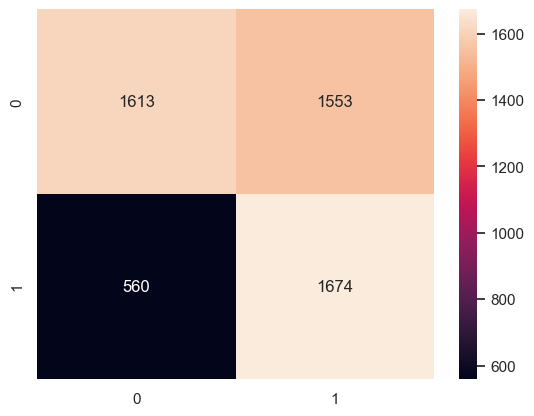

In [144]:
sns.heatmap(cm ,annot = True, fmt = 'g')

In [150]:
from sklearn.svm import SVC

In [152]:
model = SVC()


In [153]:
model.fit(X_train, y_train)

SVC()

In [157]:
y_pred = model.predict(X_test)

In [158]:
accuracy_score(y_test, y_pred)

0.6242592592592593

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
model_D = DecisionTreeClassifier()
model_D.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
y_pred = model_D.predict(X_test)

In [162]:
accuracy_score(y_test, y_pred)

0.6025925925925926

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
model_R = RandomForestClassifier()
model_R.fit(X_train, y_train)

RandomForestClassifier()

In [187]:
y_pred = model_R.predict(X_test)

In [188]:
accuracy_score(y_test,y_pred)

0.6638888888888889

In [189]:
from sklearn.model_selection import cross_val_score

In [190]:
scores = cross_val_score(estimator= model_R,
                         X = X_train,
                         y = y_train,
                         cv = 10)

In [191]:
scores

array([0.79753915, 0.79138702, 0.77684564, 0.78467562, 0.78411633,
       0.76845638, 0.78299776, 0.78355705, 0.77852349, 0.78020134])

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [172]:
model_R_new = RandomForestClassifier()

In [174]:
model_R_Grid = GridSearchCV(model_R_new,param_grid= param_grid)

In [175]:
model_R_Grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [176]:
model_R_Grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [181]:
best_classifier = RandomForestClassifier(max_depth =None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

In [182]:
best_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [249]:
y_pred = best_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6703703703703704


In [248]:
scores = cross_val_score(estimator= best_classifier,
                         X = X_train,
                         y = y_train,
                         cv = 10)



In [194]:
# Analyzing Coefficients
classifier.coef_

array([[-1.65936809e-01,  2.41493914e-01,  3.85998328e-02,
        -7.36354085e-01, -3.79662836e-01,  8.86338166e-02,
         1.10328385e-01,  1.27879393e-03,  7.08500160e-04,
         4.39172510e-02, -9.24154357e-03,  1.36690775e-01,
         1.16035810e-01,  3.88918763e-02,  8.07721568e-02,
        -4.03916267e-02,  5.94858476e-02,  9.17134990e-02,
         1.10550903e-01,  7.14005683e-02,  4.54571775e-02,
        -2.35317226e-01,  4.02223371e-03, -4.02905154e-02,
         1.11256136e-02, -2.22990177e-02, -1.47573127e-02,
        -4.24483115e-02,  8.89746513e-02, -6.31934285e-03,
         2.05255638e-03,  7.59232220e-03,  2.17554967e-02,
        -3.15114604e-02,  1.98728067e-03, -7.54220211e-03,
         9.89359938e-03, -1.01350366e-02, -6.39260489e-03,
        -1.64733701e-02, -2.28588512e-04]])

In [203]:
pd.concat((pd.DataFrame(X_train.columns.values, columns = ['features']),
pd.DataFrame(np.transpose(classifier.coef_), columns =['Coefficient'])) , axis = 1)

,features,Coefficient
0,age,-0.165937
1,deposits,0.241494
2,withdrawal,0.038600
3,purchases_partners,-0.736354
4,purchases,-0.379663
5,cc_taken,0.088634
6,cc_recommended,0.110328
7,cc_disliked,0.001279
8,cc_liked,0.000709
9,cc_application_begin,0.043917


Feature selection

In [205]:
from sklearn.feature_selection import RFE

In [215]:
classifier = LogisticRegression()

In [217]:
from sklearn.feature_selection import RFE

# Assuming classifier is your estimator
classifier = LogisticRegression()  # Your classifier instantiation here

# Assuming X_train and y_train are your training data
rfe = RFE(estimator=classifier, n_features_to_select=20)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [218]:
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True  True  True  True False False  True False  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False  True False False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  1 20 21  1 14  1  1  4  1  1  1  1  1  1  1  1 17  1
  9  7  8  2  1 13 18 16  5  3 19 11 15 10 12  6 22]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O',
       'payment_type_Weekly'],
      dtype='object')

In [223]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [224]:
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

LogisticRegression()

In [225]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [226]:
accuracy_score(y_test, y_pred)

0.6088888888888889

In [227]:
precision_score(y_test, y_pred)

0.5187461585740627

In [228]:
recall_score(y_test, y_pred)

0.7555953446732319

In [229]:
f1_score(y_test, y_pred)

0.6151603498542273

In [230]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

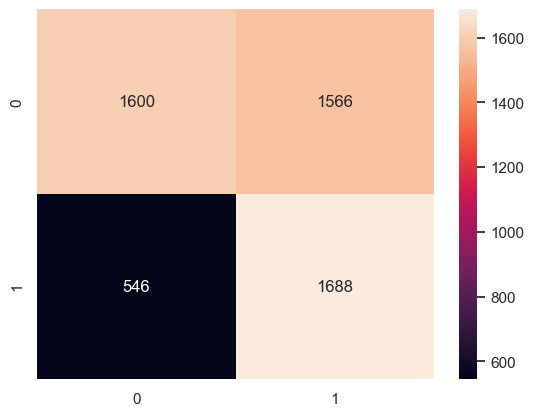

In [232]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [233]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))


SVM Accuracy: 0.647 (+/- 0.018)


In [241]:
pd.concat((pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ['features']), pd.DataFrame(np.transpose(classifier.coef_), columns = ['coefficient'])),axis = 1)

,features,coefficient
0,age,-0.168366
1,deposits,0.245181
2,withdrawal,0.039377
3,purchases_partners,-0.732108
4,purchases,-0.383416
5,cc_taken,0.090445
6,cc_recommended,0.114990
7,cc_application_begin,0.046071
8,web_user,0.136050
9,ios_user,0.083444


In [243]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop = True)

In [247]:
final_results

,user,churn,predicted_churn
0,53016,1.0,1
1,54963,0.0,0
2,10511,0.0,0
3,64269,0.0,1
4,30978,0.0,0
...,...,...,...
5395,50513,1.0,1
5396,42775,0.0,1
5397,15284,1.0,1
5398,10432,1.0,0
